In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [7]:
df = pd.read_csv("./cleaned_titanic_data.csv")

In [6]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [16]:
X = df[['Pclass', 'Age',  'Gender']]
y = df['Survived']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=43)

In [18]:
X_train

,Pclass,Age,Gender
826,3,29.699118,1
838,3,32.000000,1
763,1,36.000000,0
189,3,36.000000,1
109,3,29.699118,0
...,...,...,...
277,2,29.699118,1
817,2,31.000000,1
255,3,29.000000,0
320,3,22.000000,1


In [19]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
from sklearn import tree

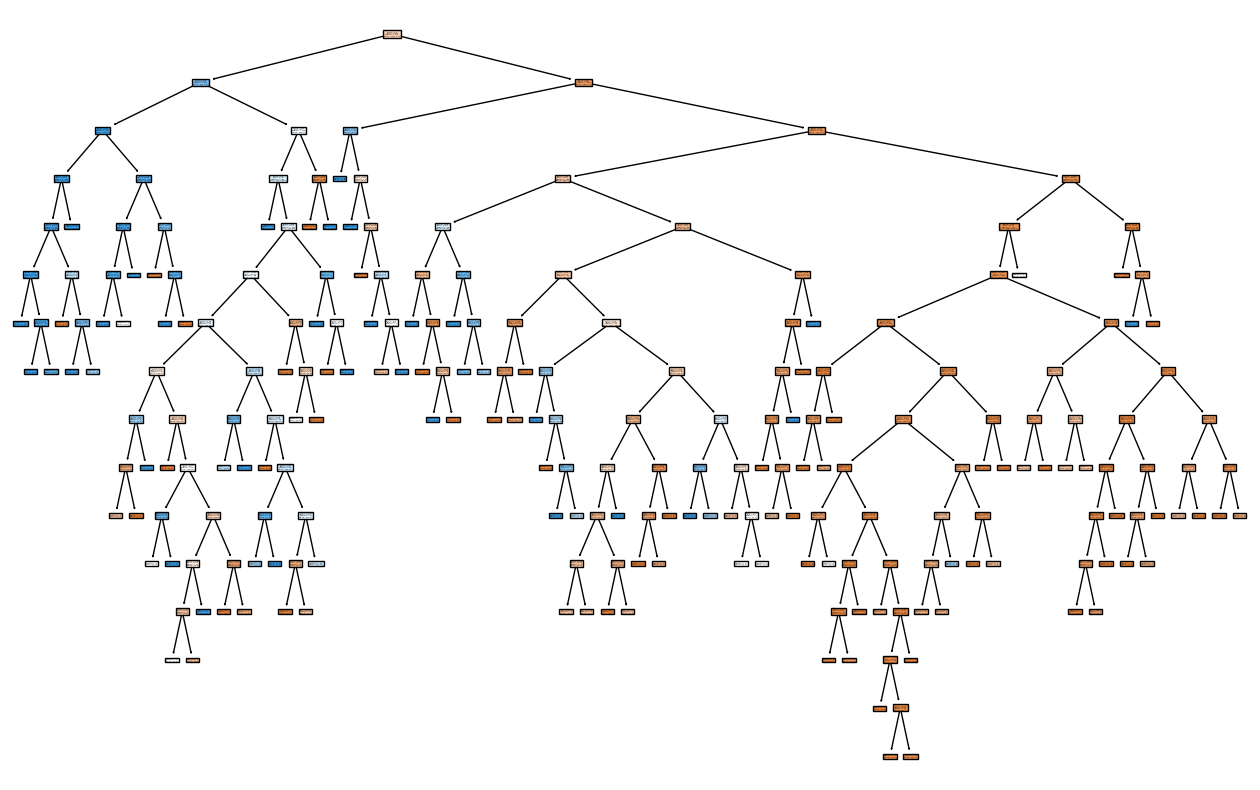

In [21]:
plt.figure(figsize=(16,10))
# tree.plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
tree.plot_tree(dtree, filled=True)
plt.show()

In [22]:
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)


In [23]:
confusion_matrix(y_train, y_train_pred)

array([[414,  25],
       [ 50, 223]], dtype=int64)

In [24]:
accuracy_score(y_train, y_train_pred)

0.8946629213483146

In [25]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       439
           1       0.90      0.82      0.86       273

    accuracy                           0.89       712
   macro avg       0.90      0.88      0.89       712
weighted avg       0.89      0.89      0.89       712



In [29]:
# Test

confusion_matrix(y_test, y_test_pred)

array([[97, 13],
       [27, 42]], dtype=int64)

In [30]:
accuracy_score(y_test, y_test_pred)

0.776536312849162

In [31]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       110
           1       0.76      0.61      0.68        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.75       179
weighted avg       0.78      0.78      0.77       179



# Post-Pruning

In [33]:
dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

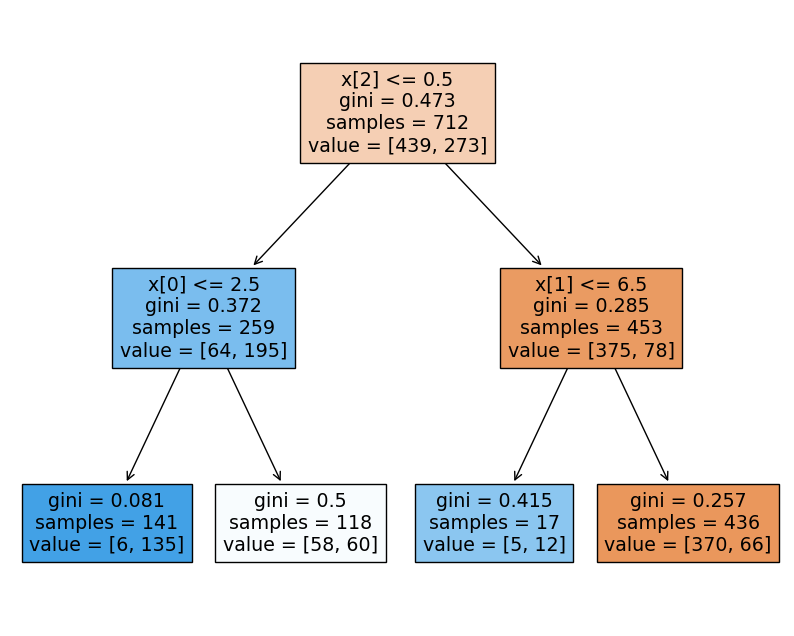

In [34]:
plt.figure(figsize=(10,8))
tree.plot_tree(dtree, filled=True)
plt.show()

In [35]:
confusion_matrix(y_train, y_train_pred)

array([[414,  25],
       [ 50, 223]], dtype=int64)

In [36]:
accuracy_score(y_train,y_train_pred)

0.8946629213483146

In [37]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       439
           1       0.90      0.82      0.86       273

    accuracy                           0.89       712
   macro avg       0.90      0.88      0.89       712
weighted avg       0.89      0.89      0.89       712



In [38]:
#TEST

confusion_matrix(y_test, y_test_pred)

array([[97, 13],
       [27, 42]], dtype=int64)

In [39]:
accuracy_score(y_test, y_test_pred)

0.776536312849162

In [40]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       110
           1       0.76      0.61      0.68        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.75       179
weighted avg       0.78      0.78      0.77       179

